11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


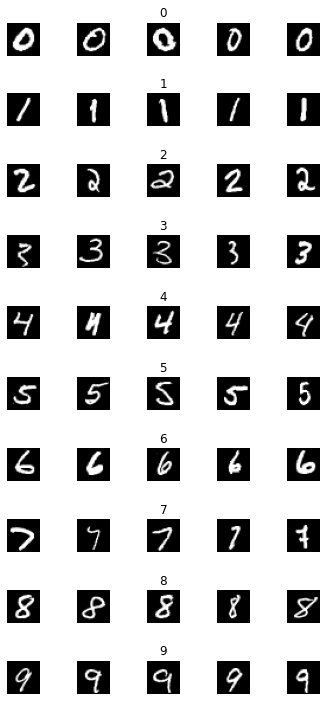

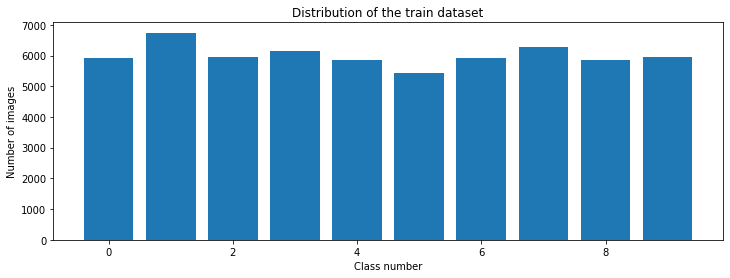

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.models import Model
import random

np.random.seed(0)




(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)


assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."



num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))


print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()




X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [3]:
#define the leNet model function, LeNet is slightly older CNN algorithm, it is like Alex Net
def leNet_model ():
  model = Sequential()
  #Conv2D: 1. no of filter, 2. the size of the filters, 3. shape of the input image, 4. the act func
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu')) #this Conv2D also takes 2 other args: padding means the outer layer we apply to the input layer so we don't miss any edges, strides means the unit by which you want to increment the kernal; rn they are left at their default values. Padding is left as the same as the input images because we dont have much info at the edges
  model.add(MaxPooling2D(pool_size=(2,2))) #reduces the image size by half
  model.add(Conv2D(15, (3,3), activation='relu')) #this part is highly computationally heave as each image now has 30 filter and we are adding 15 more filters
  model.add(MaxPooling2D(2,2))
  model.add(Flatten()) #making 1d before feeding to Dense NN
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5)) #randomly shuts off half of the nodes during training to prevent overfitting and increase testing accuracy
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [4]:
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

In [5]:
#lets run this baby {insert fire emoji here}
history = model.fit(X_train, y_train, epochs=10, batch_size=400, validation_split=0.1, verbose=1, shuffle=True)

Epoch 1/10
135/135 [==============================] - 34s 10ms/step - loss: 0.5375 - accuracy: 0.8233 - val_loss: 0.0537 - val_accuracy: 0.9837
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0439 - val_accuracy: 0.9875
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0559 - accuracy: 0.9823 - val_loss: 0.0485 - val_accuracy: 0.9858
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0464 - accuracy: 0.9854 - val_loss: 0.0418 - val_accuracy: 0.9898
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0443 - val_accuracy: 0.9890
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0411 - accuracy: 0.9870 - val_loss: 0.0403 - val_accuracy: 0.9900
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0429 - accuracy: 0.9868 - val_loss: 0.0402 - val_accuracy: 0.9912
Epoc

Text(0.5, 0, 'epoch')

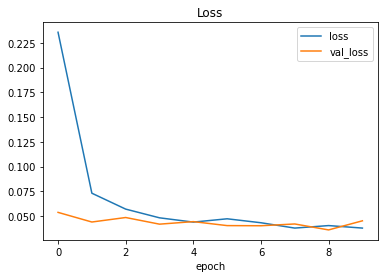

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

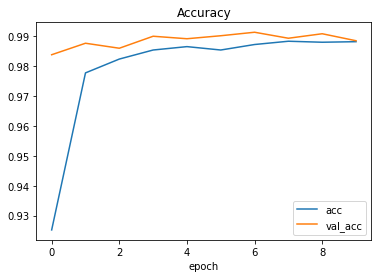

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [8]:
#testing the tesing data
trainingData = model.evaluate(X_test, y_test, verbose=0)
print(type(trainingData))
print('Test score is: ', trainingData[0])
print('Test accuracy is: ', trainingData[1])

<class 'list'>
Test score is:  0.037732359021902084
Test accuracy is:  0.9886999726295471


In [9]:
model.save('NumberRecognitionModel.h5')
from google.colab import files
files.download('NumberRecognitionModel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>